In [33]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [34]:
species = {S.name: S for S in ct.Species.list_from_file("gri30.yaml")}

# Create an IdealGas object with species representing complete combustion - 1atm
complete_species = [species[S] for S in ("CH4", "O2", "N2", "CO2", "H2O")]
gas1 = ct.Solution(thermo="ideal-gas", species=complete_species)

#creating an array of varying values of equivalence ratio from 0.5 to 1.5 to loop through
phi = np.linspace(0.5, 1.5, 100)

#an array to store the flame temperatures
T_complete = np.zeros(phi.shape)
for i in range(len(phi)):
    gas1.TP = 300, ct.one_atm
    gas1.set_equivalence_ratio(phi[i], "CH4", "O2:1, N2:3.76")
    gas1.equilibrate("HP")
    T_complete[i] = gas1.T

In [35]:
# Create an IdealGas object including incomplete combustion species - 1atm

gas2 = ct.Solution(thermo="IdealGas", species=species.values())
T_incomplete = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, ct.one_atm
    gas2.set_equivalence_ratio(phi[i], "CH4", "O2:1, N2:3.76")
    gas2.equilibrate("HP")
    T_incomplete[i] = gas2.T

***

In [36]:
species = {S.name: S for S in ct.Species.list_from_file("gri30.yaml")}

# Create an IdealGas object with species representing complete combustion - 100atm
complete_species = [species[S] for S in ("CH4", "O2", "N2", "CO2", "H2O")]
gas1 = ct.Solution(thermo="ideal-gas", species=complete_species)

#creating an array of varying values of equivalence ratio from 0.5 to 1.5 to loop through
phi = np.linspace(0.5, 1.5, 100)

#an array to store the flame temperatures
T1 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas1.TP = 300, 1e7 
    gas1.set_equivalence_ratio(phi[i], "CH4", "O2:1, N2:3.76")
    gas1.equilibrate("HP")
    T1[i] = gas1.T

In [37]:
# Create an IdealGas object including incomplete combustion species - 100atm

gas2 = ct.Solution(thermo="IdealGas", species=species.values())
T2 = np.zeros(phi.shape)
for i in range(len(phi)):
    gas2.TP = 300, 1e7
    gas2.set_equivalence_ratio(phi[i], "CH4", "O2:1, N2:3.76")
    gas2.equilibrate("HP")
    T2[i] = gas2.T

***

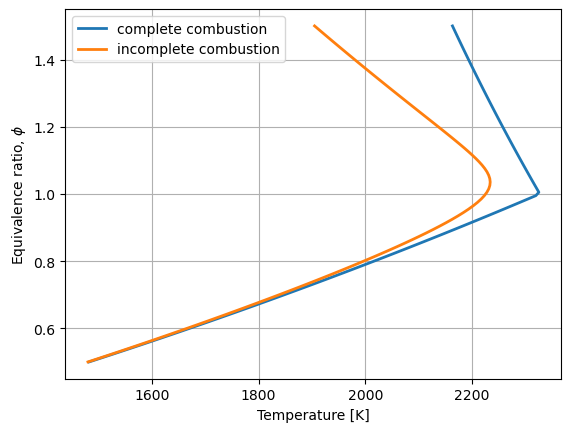

In [38]:
plt.plot(T_complete, phi, label="complete combustion", lw=2)
plt.plot(T_incomplete, phi, label="incomplete combustion", lw=2)
plt.grid(True)
plt.legend()
plt.ylabel(r"Equivalence ratio, $\phi$")
plt.xlabel("Temperature [K]");

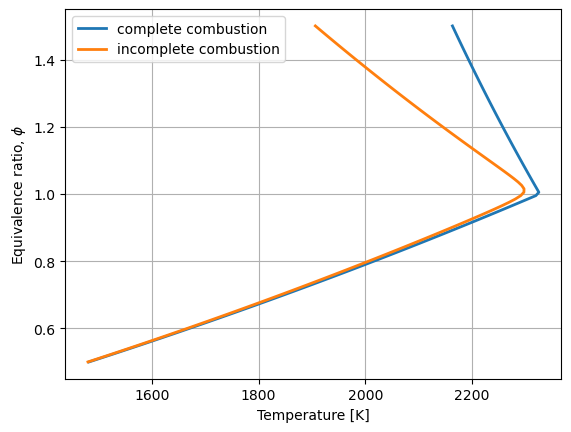

In [39]:
plt.plot(T1, phi, label="complete combustion", lw=2)
plt.plot(T2, phi, label="incomplete combustion", lw=2)
plt.grid(True)
plt.legend()
plt.ylabel(r"Equivalence ratio, $\phi$")
plt.xlabel("Temperature [K]");